In [1]:
import os

assert os.environ['CONDA_DEFAULT_ENV']=='ttv'

In [3]:
import lightkurve as lk
%matplotlib inline

/home/jerome/miniconda3/envs/ttv/lib/python3.10/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /home/jerome/.lightkurve/cache. Please move all the files in the legacy directory /home/jerome/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


In [39]:
import sys
sys.path.insert(0, '../code')
from utils import get_tois

df = get_tois()

Loaded:  ../data/TOIs.csv


In [60]:
tic = 54962195
d = df[df['TIC ID'].apply(str).str.contains(str(tic))]
d[["Period (days)","Epoch (BJD)"]]

,TIC ID,TOI,Previous CTOI,Master,SG1A,SG1B,SG2,SG3,SG4,SG5,...,Stellar Radius (R_Sun) err,Stellar Metallicity,Stellar Metallicity err,Stellar Mass (M_Sun),Stellar Mass (M_Sun) err,Sectors,Date TOI Alerted (UTC),Date TOI Updated (UTC),Date Modified,Comments
473,54962195,663.01,NaN,3,4,4,4,4,3,4,...,0.01524,NaN,NaN,0.510139,0.020301,"9,35",2019-05-07,2021-07-14,2022-12-14 12:09:24,potential multi
474,54962195,663.02,NaN,3,4,4,4,4,3,4,...,0.01524,NaN,NaN,0.510139,0.020301,"9,35",2019-05-07,2021-07-08,2022-12-14 12:09:24,low SNR
475,54962195,663.03,NaN,1,4,1,1,4,4,4,...,0.01524,NaN,NaN,0.510139,0.020301,"9,35",2021-07-08,2021-07-08,2022-12-14 12:09:24,candidate 3 in multi-planet system; low SNR


In [ ]:
result = lk.search_lightcurve(f'TIC {tic}', author='TESS-SPOC')
lc = result.download_all().stitch()

/home/jerome/miniconda3/envs/ttv/lib/python3.10/site-packages/lightkurve/lightcurve.py:1040: LightkurveWarning: `epoch_time` appears to be given in JD, however the light curve time uses BTJD (i.e. JD - 2457000).
  warnings.warn(
/home/jerome/miniconda3/envs/ttv/lib/python3.10/site-packages/lightkurve/lightcurve.py:1040: LightkurveWarning: `epoch_time` appears to be given in JD, however the light curve time uses BTJD (i.e. JD - 2457000).
  warnings.warn(
/home/jerome/miniconda3/envs/ttv/lib/python3.10/site-packages/lightkurve/lightcurve.py:1040: LightkurveWarning: `epoch_time` appears to be given in JD, however the light curve time uses BTJD (i.e. JD - 2457000).
  warnings.warn(


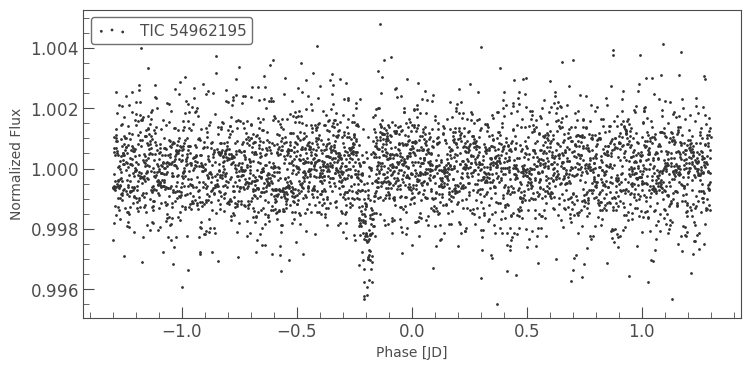

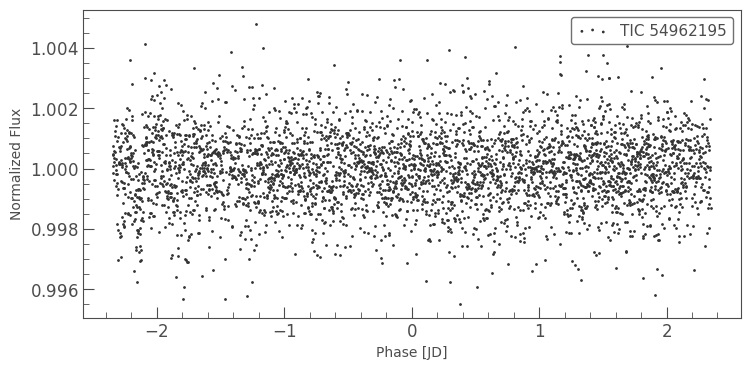

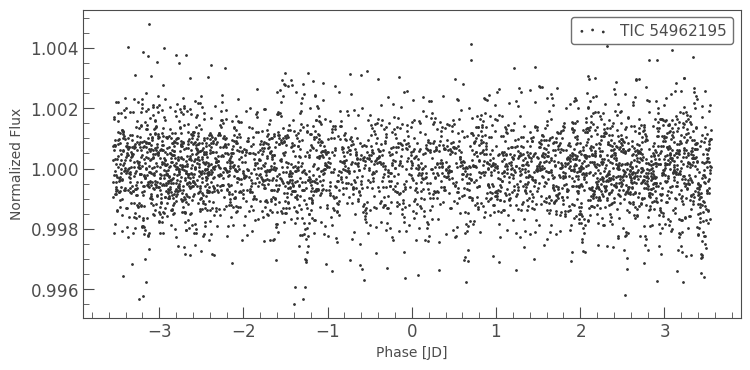

In [62]:
for i,row in d.iterrows():
    p, t0 = row["Period (days)"], row["Epoch (BJD)"]
    fold = lc.flatten().fold(period=p, epoch_time=t0)
    ax = fold.scatter()

## check signs of Prot

/home/jerome/miniconda3/envs/ttv/lib/python3.10/site-packages/lightkurve/search.py:414: LightkurveWarning: Warning: 25 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/jerome/miniconda3/envs/ttv/lib/python3.10/site-packages/lightkurve/search.py:414: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/jerome/miniconda3/envs/ttv/lib/python3.10/site-packages/lightkurve/search.py:414: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/jerome/miniconda3/envs/ttv/

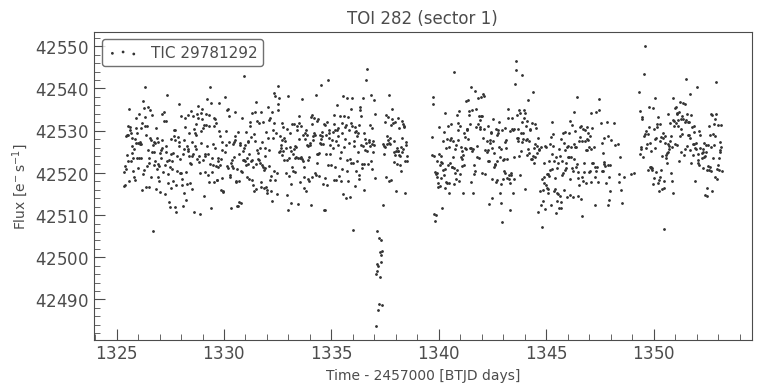

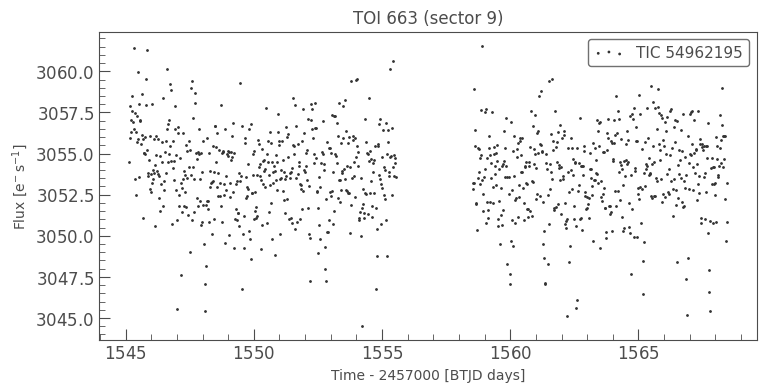

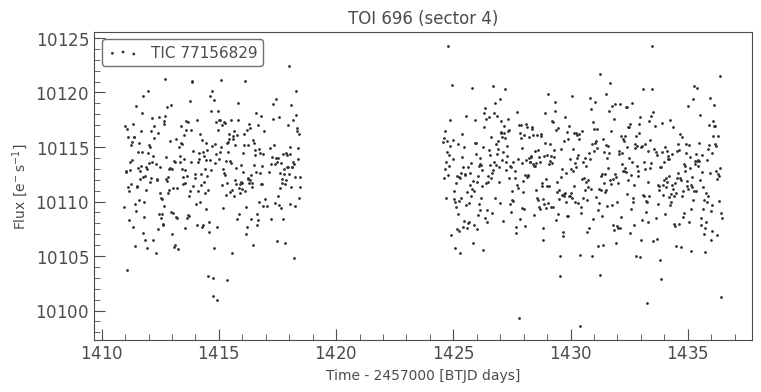

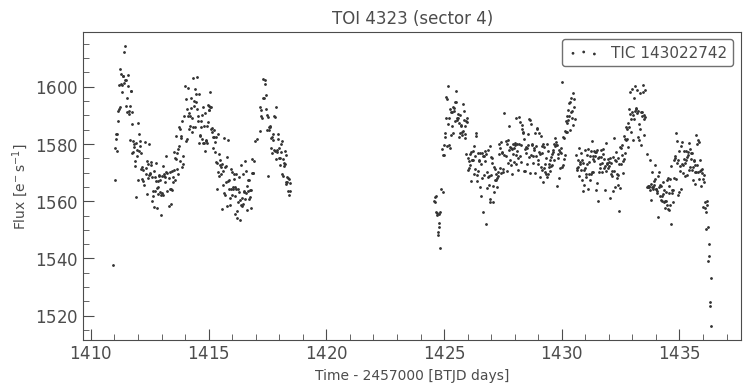

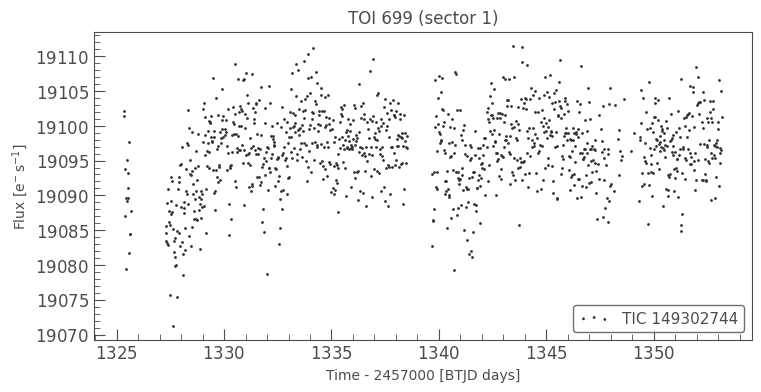

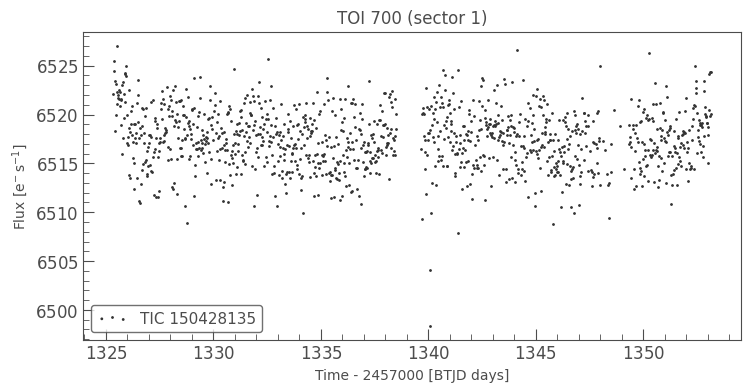

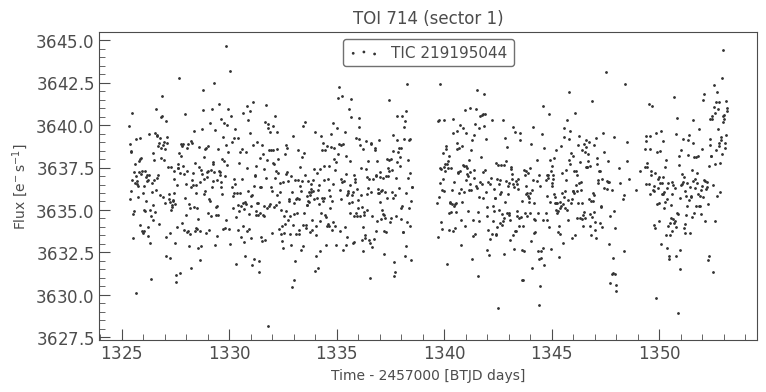

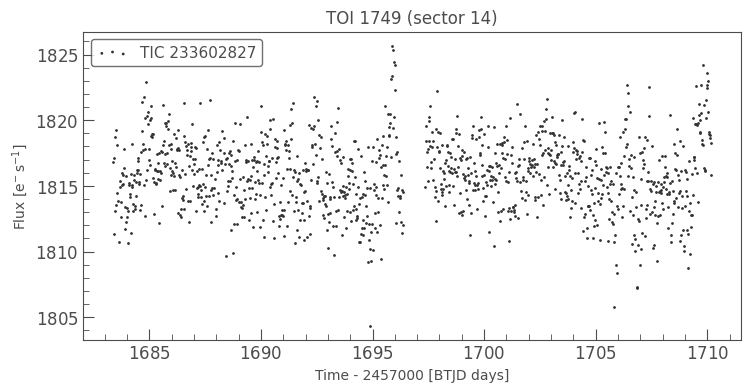

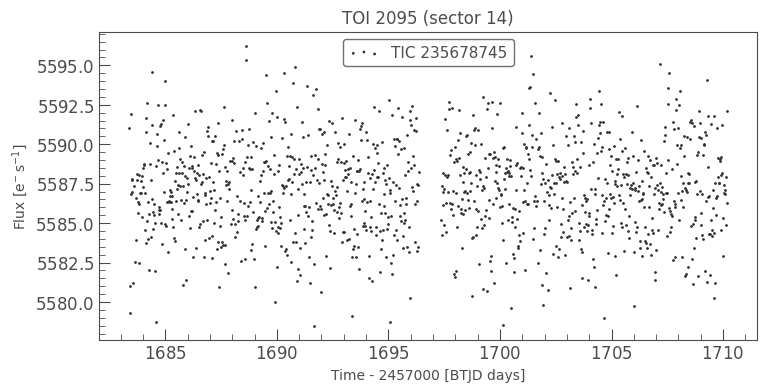

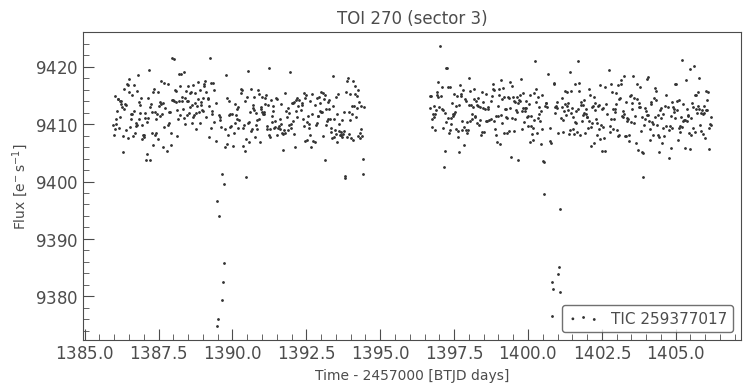

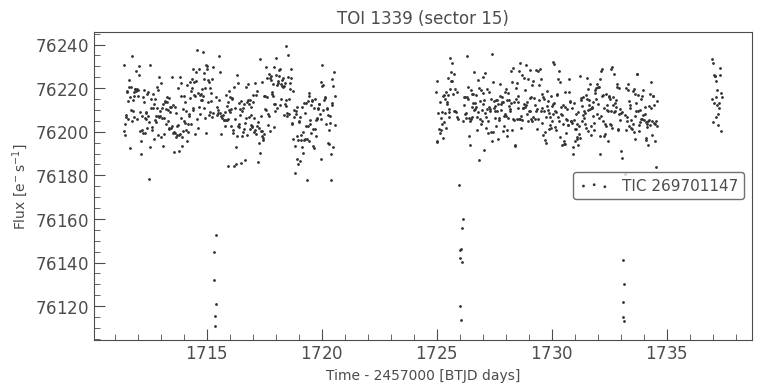

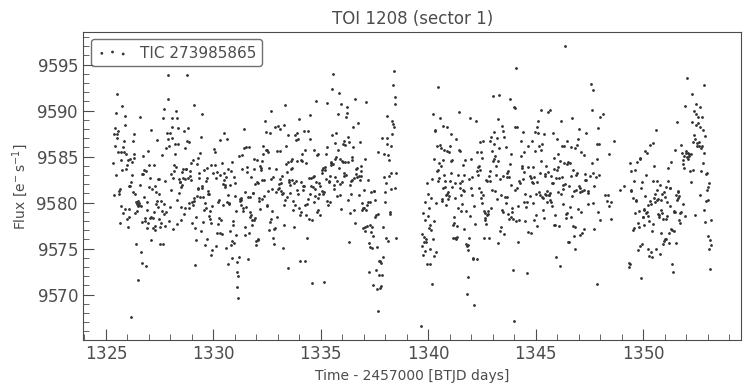

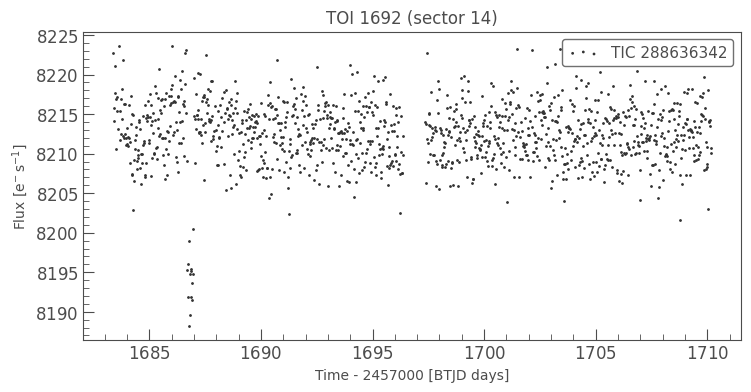

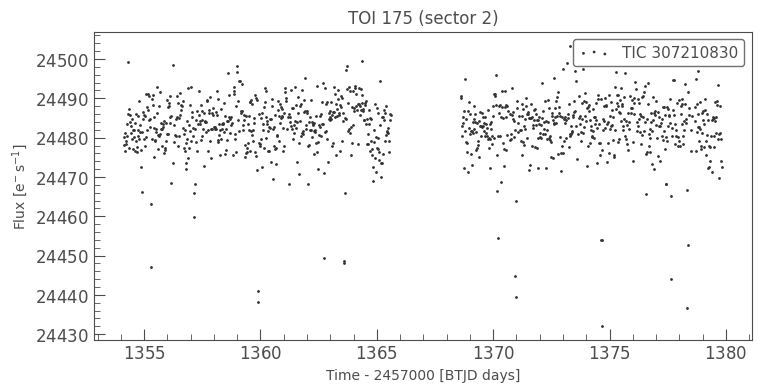

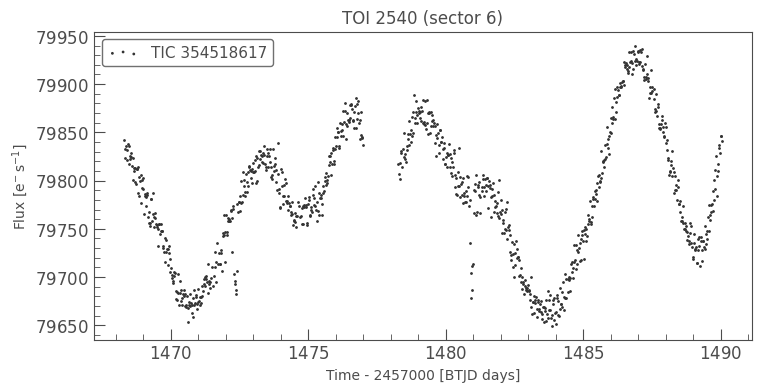

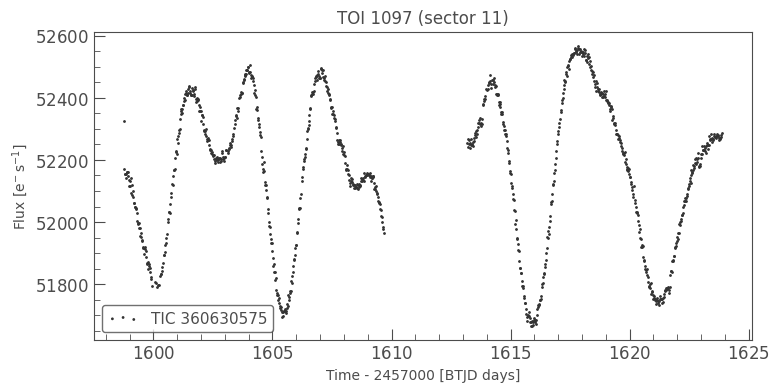

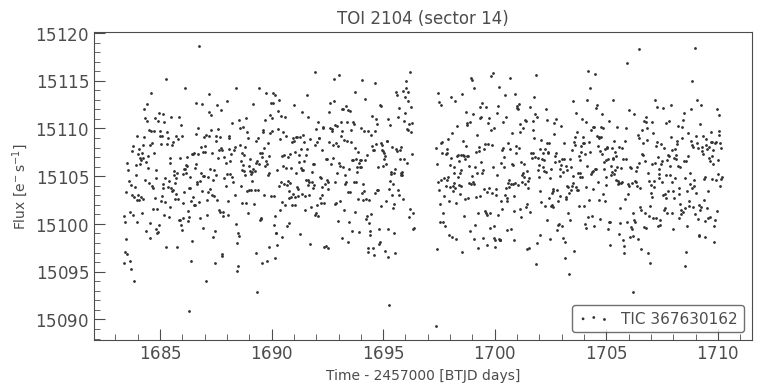

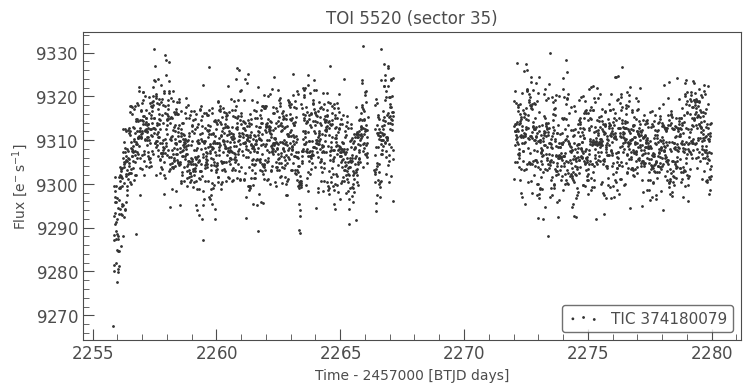

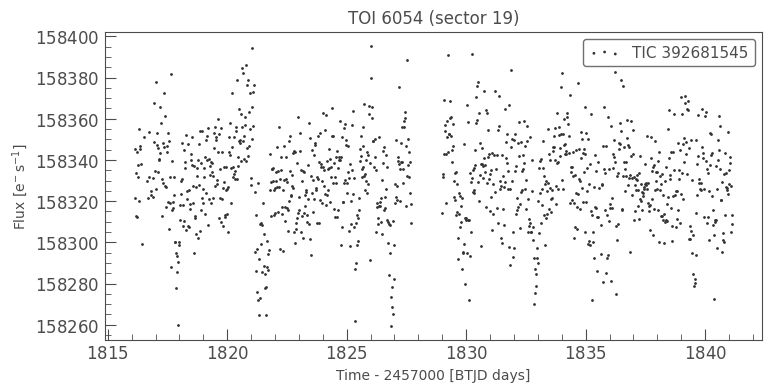

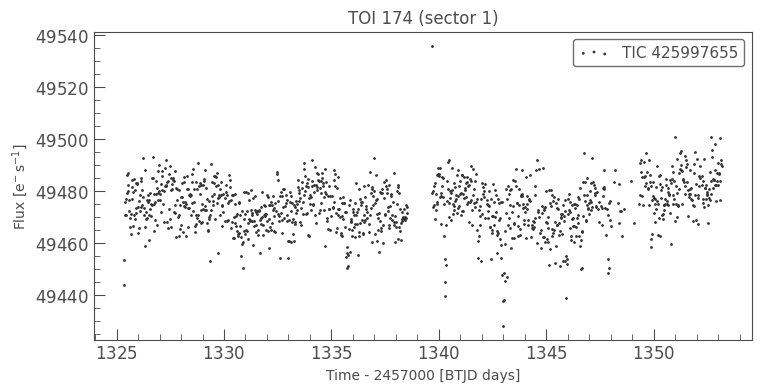

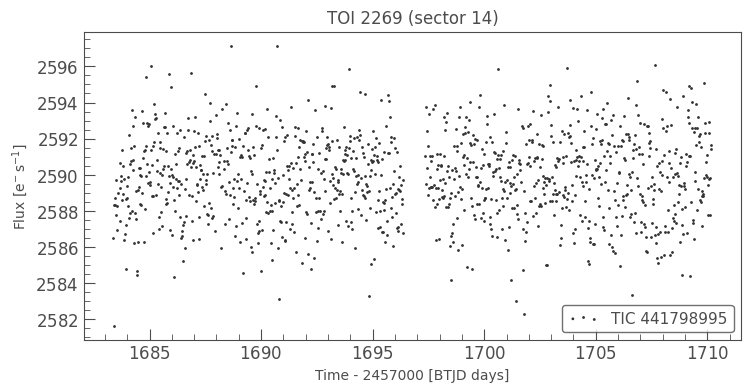

In [103]:
multi_sector = False

for i,row in df_resonant.iterrows(): 
    tic = row['tic']
    d = df[df['TIC ID'].apply(str).str.contains(str(tic))]
    toi = str(d.TOI.iloc[0]).split('.')[0]
    result = lk.search_lightcurve(f'TIC {tic}', author='TESS-SPOC')
    if result:
        if multi_sector:
            lc = result.download_all().stitch()
        else:
            lc = result.download()
        ax = lc.scatter()
        ax.set_title(f"TOI {toi} (sector {lc.sector})")

## check transit signal

/home/jerome/miniconda3/envs/ttv/lib/python3.10/site-packages/lightkurve/search.py:414: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


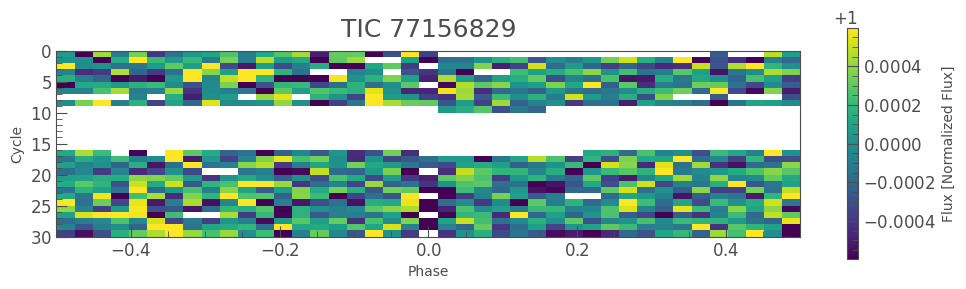

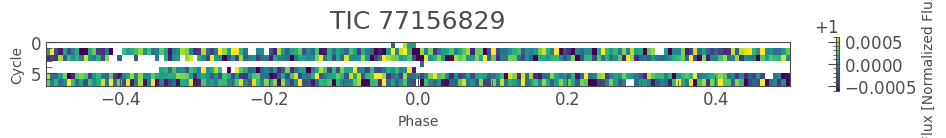

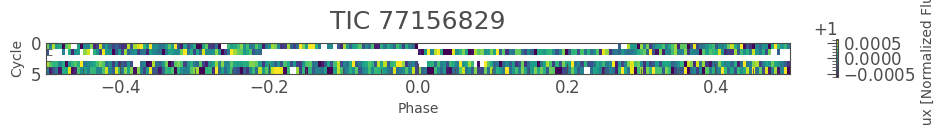

In [82]:
multi_sector = False

for i,row in df_resonant.iloc[2:4].iterrows(): 
    tic = row['tic']
    d = df[df['TIC ID'].apply(str).str.contains(str(tic))]
    result = lk.search_lightcurve(f'TIC {tic}', author='TESS-SPOC')
    if result:
        if multi_sector:
            lc = result.download_all().stitch()
        else:
            lc = result.download()
        flat = lc.flatten()
        for i,row in d.iterrows():
            p, t0 = row["Period (days)"], row["Epoch (BJD)"]-2457000
            fold = flat.fold(period=p, epoch_time=t0)
            ax = fold.scatter(label=f"TOI {row['TOI']}")
            ax.set_title(f"P={p:.2f}d")
            if False:
                fold.plot_river();
    break